In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Skin_Cancer_Metadata.csv")
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [3]:
features = df[['age', 'sex', 'localization']]

In [4]:
features = pd.get_dummies(features)

In [5]:
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'most_frequent'
features_imputed = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

In [6]:
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features_imputed)

In [7]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [8]:
k = 3  # or k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(features_standardized)

In [9]:
df['cluster'] = clusters

In [10]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv('Skin_Cancer_Metadata.csv')

exclude_columns = ['dx', 'dx_type']
features = df.drop('dx', axis=1)

label_encoder = LabelEncoder()
for column in features.select_dtypes(include=['object']).columns:
    features[column] = label_encoder.fit_transform(features[column])

# Handle missing values with SimpleImputer
imputer = SimpleImputer(strategy='mean')
features_imputed = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features_imputed)

# Use k-means algorithm with k=3 or k=5
k = 3  # or k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(features_standardized)

# Add the cluster labels back to the DataFrame
df['cluster'] = clusters


In [11]:
from scipy.spatial.distance import cdist

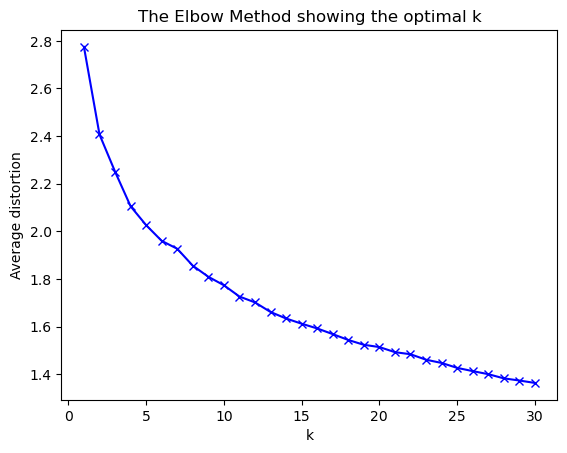

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np


numeric_df = df.select_dtypes(include=[np.number])

label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Handle missing values with SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Standardize the features
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_imputed)

# Use k-means algorithm with k=3 or k=5
k = 3  # or k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(df_standardized)

# Add the cluster labels back to the DataFrame
df['cluster'] = clusters

# Now you can plot the elbow method
distortions = []
K = range(1, 31)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_standardized)
    distortions.append(sum(np.min(cdist(df_standardized, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_standardized.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


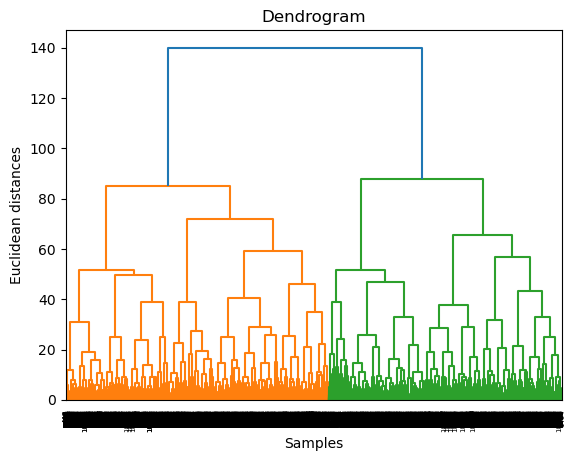

In [13]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(features_standardized, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()
